
![Image of Yaktocat](https://github.com/jesugome/InfluencersInSocialNetworks/raw/master/logoAnalytics.png)


# Birds

![Image of Yaktocat](http://tremendouswallpapers.com/wp-content/uploads/2014/12/Venette-Waste_Trend-F-W-14-15_Neat-Graphics_mandarin-duck.jpg)
    
 ## Machine Learning Project

Developed by [Jesus Solano](http://www.jesussolano.com/) -- [Sergio Castelblanco](http://www.jesussolano.com/) -- [Jose Sandoval](http://www.jesussolano.com/) -- [Aleksey Sepulveda](http://www.jesussolano.com/)


version 8.3, June 24 2018

## Load Datasets

In [1]:
# Download datasets.

import os.path
import numpy as np

# If datasets already exist do nothing. 

if not os.path.exists('birds.zip'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds.zip
    
if not os.path.exists('birds_f_numbers.txt'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds_f_numbers.txt
    
if not os.path.exists('birds_training_pairs.txt'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds_training_pairs.txt


--2018-07-14 15:40:20--  http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds.zip
Resolving www-cvr.ai.uiuc.edu (www-cvr.ai.uiuc.edu)... 128.174.227.253
Connecting to www-cvr.ai.uiuc.edu (www-cvr.ai.uiuc.edu)|128.174.227.253|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43988823 (42M) [application/zip]
Saving to: ‘birds.zip’

birds.zip           100%[===================>]  41.95M  44.6MB/s    in 0.9s    

2018-07-14 15:40:21 (44.6 MB/s) - ‘birds.zip’ saved [43988823/43988823]

--2018-07-14 15:40:22--  http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds_f_numbers.txt
Resolving www-cvr.ai.uiuc.edu (www-cvr.ai.uiuc.edu)... 128.174.227.253
Connecting to www-cvr.ai.uiuc.edu (www-cvr.ai.uiuc.edu)|128.174.227.253|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4656 (4.5K) [text/plain]
Saving to: ‘birds_f_numbers.txt’

birds_f_numbers.txt 100%[===================>]   4.55K  --.-KB/s    in 0s      

2018-07-14 15:40:22 (269 MB/s) - ‘birds_f

In [0]:
import os 
import zipfile

# Extract images zip file
with zipfile.ZipFile("birds.zip","r") as zip_ref:
    zip_ref.extractall(os.getcwd())

Using TensorFlow backend.


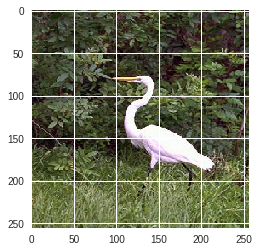

In [4]:
# Shows an image example of training set.
%matplotlib inline

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('birds/egret/egr013.jpg',grayscale=False,target_size=(256,256),interpolation='nearest') 
x= img_to_array(img)
plt.imshow(x/255)


In [0]:
# Create a random sorted list to split set of images in train and test.
import random

randomList= random.sample(range(1,101),100)

formating = "{:03d}".format

formatedList = [formating(item) for item in randomList]

In [0]:
from PIL import Image

# The target size is set due to Xception neural networks requisities. 

xsize = 299
ysize = 299

paths=['egret','mandarin','owl','puffin','toucan','wood_duck']

maxImage= 80

pre=''
birdKind=-1

xL=[]
yL=[]


# For to read, resize and split data into train and test.
for j in paths[:]:
    if(j=='egret'):
        pre='/egr'
        birdKind=0
    elif(j=='mandarin'):
        pre='/man'
        birdKind=1
    elif(j=='owl'):
        pre='/owl'
        birdKind=2
    elif(j=='puffin'):
        pre='/puf'
        birdKind=3
    elif(j=='toucan'):
        pre='/tou'
        birdKind=4
    elif(j=='wood_duck'):
        pre='/wod'
        birdKind=5

        
    counter=0
    for i in formatedList[:]:
        
        # Resize images to 224X224
        
        img = Image.open('birds/'+j+pre+i+'.jpg')
        wpercent = (xsize/float(img.size[0]))
        img = img.resize((xsize,ysize), Image.ANTIALIAS)
        img.save('birds/'+j+pre+i+'.jpg')
        
        # Load resized image to save into train or test array.
        img = load_img('birds/'+j+pre+i+'.jpg',grayscale=False,target_size=(xsize,ysize),interpolation='nearest') 
        x= img_to_array(img)
        
        xL.append(x)
        yL.append(birdKind)
          
        counter=counter+1
        

In [0]:
# Convert lists to arrays.
from sklearn.model_selection import train_test_split

xList=np.asarray(xL)
yList=np.asarray(yL)

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# Encode class values as integers.
encoder = LabelEncoder()
encoder.fit(yList)
encoded_Y = encoder.transform(yList)
# Convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_Y)

xTrain,xTest,yTrain,yTest = train_test_split(xList, y, test_size=0.3, random_state=22)

In [8]:
# Delete pre existing files.
! rm -r datasets/
yTrain

rm: cannot remove 'datasets/': No such file or directory


array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# Copy the images to folder(Not need but useful if we change the train generator)
from shutil import copy
counter = 0

if not os.path.exists('datasets/train/'):
  os.makedirs('datasets/train/egr')
  os.makedirs('datasets/train/man')
  os.makedirs('datasets/train/tou')
  os.makedirs('datasets/train/owl')
  os.makedirs('datasets/train/puf')
  os.makedirs('datasets/train/wod')
  
if not os.path.exists('datasets/test/'):
  os.makedirs('datasets/test/egr')
  os.makedirs('datasets/test/man')
  os.makedirs('datasets/test/tou')
  os.makedirs('datasets/test/owl')
  os.makedirs('datasets/test/puf')
  os.makedirs('datasets/test/wod')
    
for i in formatedList[:]:
  if counter < maxImage:
    copy('birds/egret/egr'+i+'.jpg','datasets/train/egr/egr'+i+'.jpg')
    copy('birds/mandarin/man'+i+'.jpg','datasets/train/man/man'+i+'.jpg')
    copy('birds/toucan/tou'+i+'.jpg','datasets/train/tou/tou'+i+'.jpg')
    copy('birds/owl/owl'+i+'.jpg','datasets/train/owl/owl'+i+'.jpg')
    copy('birds/puffin/puf'+i+'.jpg','datasets/train/puf/puf'+i+'.jpg')
    copy('birds/wood_duck/wod'+i+'.jpg','datasets/train/wod/wod'+i+'.jpg')
  else: 
      copy('birds/egret/egr'+i+'.jpg','datasets/test/egr/egr'+i+'.jpg')
      copy('birds/mandarin/man'+i+'.jpg','datasets/test/man/man'+i+'.jpg')
      copy('birds/toucan/tou'+i+'.jpg','datasets/test/tou/tou'+i+'.jpg')
      copy('birds/owl/owl'+i+'.jpg','datasets/test/owl/owl'+i+'.jpg')
      copy('birds/puffin/puf'+i+'.jpg','datasets/test/puf/puf'+i+'.jpg')
      copy('birds/wood_duck/wod'+i+'.jpg','datasets/test/wod/wod'+i+'.jpg')
      
  counter=counter+1

In [0]:
# Images general information.

# Data path information.
trainDataPath= 'datasets/train'
testDataPath= 'datasets/test'

# Images dimensions.
widthSize =  299
heightSize = 299

# Batch Size.

batchSize = 32

# Direct Prediction



### Build CNN 
We build and train a Convolutional neural network (CNN) to classify the birds' images in six different classes.  

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

outputClasses = 6

# Define if images have color channels firts in the array.
if K.image_data_format() == 'channels_first':
    input_shape = (3, widthSize, heightSize)
else:
    input_shape = (widthSize, heightSize, 3)

# Creates a CNN model using keras.

model = Sequential()
NumN=32
NumN2=64

model.add(Conv2D(NumN, (3, 3), input_shape=input_shape))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(NumN, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(NumN2, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(NumN2))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(outputClasses))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 297, 297, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 297, 297, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 32)        0         
__________

In [0]:
!pip3 install livelossplot

In [0]:

# Compile the convolutional neural network
from keras.optimizers import adam
from keras.optimizers import SGD
from keras.optimizers import adamax
from keras.optimizers import RMSprop
from livelossplot import PlotLossesKeras

#Defines optimizer.
op = adam(lr=0.001)

# Compile the neural network.
model.compile(loss='categorical_crossentropy',
             optimizer=op,
              metrics=['accuracy'])

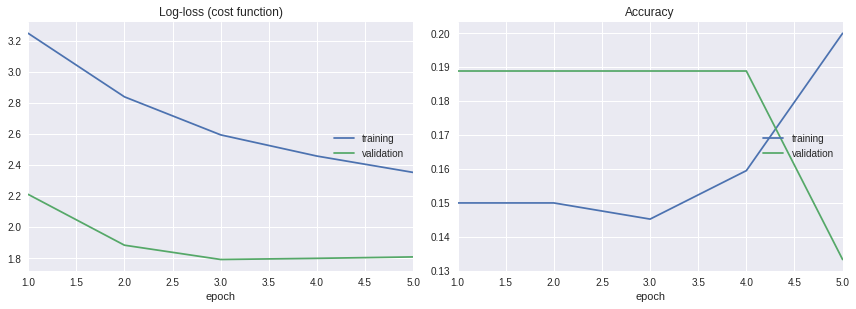

In [16]:
batch_size = 32
epochs = 5

trainingCNN = model.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = False, 
                    validation_data = [xTest,yTest],callbacks=[PlotLossesKeras()])

In [17]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = model.evaluate(xTest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])

Evaluating the test set...
180/180 [==============================] - 1s 3ms/step

Test score: 1.8093303918838501
Test accuracy: 0.13333333349890178


In [21]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = model.predict(xTest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(np.argmax(yTest,axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(np.argmax(yTest,axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr    0    0    0    0    0   29
man    0    0    0    0    0   33
owl    0    0    0    0    0   33
puf    0    0    0    0    0   34
tou    0    0    0    0    0   27
wod    0    0    0    0    0   24
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       0.00      0.00      0.00        29
        man       0.00      0.00      0.00        33
        owl       0.00      0.00      0.00        33
        puf       0.00      0.00      0.00        34
        tou       0.00      0.00      0.00        27
        wod       0.13      1.00      0.24        24

avg / total       0.02      0.13      0.03       180



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Pretrained CNN - Xception


In [22]:
from keras.applications.xception import Xception
modelXception = Xception(weights='imagenet', include_top=True)

91889664/91884032 [==============================] - 6s 0us/step


In [23]:
# Predict probabilities for each sample in test.
yPred1000P=modelXception.predict(xTest)

# Predict class for each sample in test.
yPred1000 = np.argmax(yPred1000P, axis=1)
yPred1000

array([722, 838, 659, 722, 772, 722, 659, 722, 659, 722, 722, 722, 659,
       659, 659, 659, 659, 679, 418, 659, 659, 659, 679, 652, 659, 722,
       772, 398, 659, 722, 722, 478, 722, 659, 659, 659, 722, 722, 659,
       772, 722, 722, 659, 659, 679, 659, 781, 659, 659, 659, 659, 659,
       722, 659, 520, 916, 722, 722, 679, 659, 659, 722, 722, 659, 659,
       478, 679, 659, 659, 772, 398, 772, 680, 659, 659, 722, 722, 659,
       659, 659, 659, 659, 659, 709, 652, 659, 781, 659, 659, 652, 652,
       659, 722, 659, 659, 224, 722, 722, 659, 781, 659, 659, 659, 722,
       659, 659, 659, 722, 659, 659, 722, 781, 722, 722, 659, 659, 520,
       659, 781, 659, 659, 772, 659, 659, 722, 659, 659, 680, 722, 659,
       772, 659, 659, 659, 722, 722, 659, 722, 722, 659, 722, 722, 722,
       722, 659, 680, 722, 722, 659, 659, 722, 781, 722, 659, 722, 722,
       520, 659, 722, 659, 722, 722, 659, 659, 722, 659, 781, 659, 659,
       659, 478, 722, 772, 398, 722, 722, 659, 722, 722, 722])

In [24]:
# Find the top 10 predicted classes in test set. 

unique, counts = np.unique(yPred1000, return_counts=True)

predFrequencies =pd.DataFrame( np.asarray((unique, counts)).T,columns=['Class','Count'])

sortDataFrame = predFrequencies.sort_values(by='Count',ascending=False)

topClasses=sortDataFrame.iloc[:10,:]

topClasses


,Class,Count
6,659,83
10,722,56
11,772,8
12,781,7
7,679,5
5,652,4
1,398,3
3,478,3
4,520,3
8,680,3


In [25]:
# Find the probabilities of being classify in top 10 classes for each image in test. 

testPredictorDataFrame = pd.DataFrame(yPred1000P)
topIndex=topClasses.as_matrix()[:,0]
finalPred = round(testPredictorDataFrame.iloc[:,topIndex],4)

finalPred

,659,722,772,781,679,652,398,478,520,680
0,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0388,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0002,0.9998,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.0000,0.7347,0.0000,0.0000,0.0214,0.0591,0.0010,0.0281,0.0001,0.0059


In [30]:
# Create confusion matrix(6 classes, 10 top classes)

target_names = ['egr','man','owl','puf','tou','wod']

confusionMatrix = pd.DataFrame(np.zeros(shape=(6,topIndex.shape[0])),columns=topIndex)
yTestL = np.argmax(yTest,axis=1)
for index, row in finalPred.iterrows():
    maxClass=finalPred.iloc[index,:].argmax()
    trueClass = yTestL[index]
    confusionMatrix.loc[trueClass,maxClass]= confusionMatrix.loc[trueClass,maxClass]+1
    a=0
confusionMatrix


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  import sys


,659,722,772,781,679,652,398,478,520,680
0,11.0,13.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,13.0,14.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
2,21.0,3.0,2.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0
3,19.0,10.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0
4,11.0,8.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0
5,9.0,9.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


# Transfer Learning
We use the pre-trained CNN model as a feature extractor. The pretrained model was 'Xception'. We also replace the top part of the pretrained CNN with two layers of 256 and 6 neurons respectively.

In [32]:
from keras.applications.xception import Xception
modelXceptionTF = Xception(weights='imagenet', include_top=False)

83689472/83683744 [==============================] - 3s 0us/step


In [0]:
# Pre-process X.
newXtrain=modelXceptionTF.predict(xTrain)

# Pre-process X.
newXtest=modelXceptionTF.predict(xTest)

In [34]:
newXtrain.shape

(420, 10, 10, 2048)

In [62]:
import keras.optimizers as opts
# Model structure.
outputClasses = 6

# Create the model. 
cnn_transfer = Sequential()

# Apply a convolutional layer. 
cnn_transfer.add(Flatten(input_shape=(10,10,2048)))

# Add the fully connected.
cnn_transfer.add(Dense(256, activation='relu'))

# Add a dropout.
cnn_transfer.add(Dropout(0.5))

# Add the fully connected.
cnn_transfer.add(Dense(outputClasses))

# Add the activation softmax.
cnn_transfer.add(Activation('softmax'))

cnn_transfer.summary(70)

# Compile the model. 
op=opts.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
cnn_transfer.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 16
epochs = 100

trainingCNN_Transfer = cnn_transfer.fit(newXtrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split = 0.1,
                    callbacks=[PlotLossesKeras()])

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
flatten_22 (Flatten)           (None, 204800)              0          
______________________________________________________________________
dense_49 (Dense)               (None, 256)                 52429056   
______________________________________________________________________
dropout_23 (Dropout)           (None, 256)                 0          
______________________________________________________________________
dense_50 (Dense)               (None, 6)                   1542       
______________________________________________________________________
activation_29 (Activation)     (None, 6)                   0          
Total params: 52,430,598
Trainable params: 52,430,598
Non-trainable params: 0
______________________________________________________________________
Train on 378 samples, validate on 42 samples
Epoch 1/100


ResourceExhaustedError: ignored

In [0]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = cnn_transfer.evaluate(newXtest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])

Evaluating the test set...
180/180 [==============================] - 0s 1ms/step

Test score: 7.25291870964898
Test accuracy: 0.522222222884496


In [0]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = cnn_transfer.predict(newXtest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr    9    5   10    3    2    0
man    2   22    1    1    1    6
owl    1    1   27    2    0    2
puf    2    5    8   10    0    9
tou    2    9    1    0   13    2
wod    0    8    1    1    1   13
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------


# Fine Tuning 

We use the pre-trained CNN model as a feature extractor. The pretrained model was 'Xception'. We also replace the top part of the pretrained CNN with two layers of 256 and 6 neurons respectively. Weigths in Xception are also trained.

In [0]:
from keras.applications.xception import Xception

# Model structure.
outputClasses = 6

# Load pretrained model..
modelXception = Xception(weights='imagenet', include_top=False, input_shape=(xsize,ysize,3))

# Create the model. 
modelFineTuning = Sequential()

# Add pretrained model. 
modelFineTuning.add(modelXception)

# Apply a convolutional layer. 
modelFineTuning.add(Flatten())

# Add the fully connected.
modelFineTuning.add(Dense(256, activation='softmax'))

# Add a dropout.
modelFineTuning.add(Dropout(0.5))

# Add the fully connected.
modelFineTuning.add(Dense(outputClasses))

# Add the activation softmax.
modelFineTuning.add(Activation('softmax'))

modelFineTuning.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
xception (Model)               (None, 10, 10, 2048)        20861480   
______________________________________________________________________
flatten_16 (Flatten)           (None, 204800)              0          
______________________________________________________________________
dense_31 (Dense)               (None, 256)                 52429056   
______________________________________________________________________
dropout_31 (Dropout)           (None, 256)                 0          
______________________________________________________________________
dense_32 (Dense)               (None, 6)                   1542       
______________________________________________________________________
activation_36 (Activation)     (None, 6)                   0          
Total params: 73,292,078
Trainable params: 73,237,550
Non-trainable params: 5

In [0]:
# Compile the model. 
modelFineTuning.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

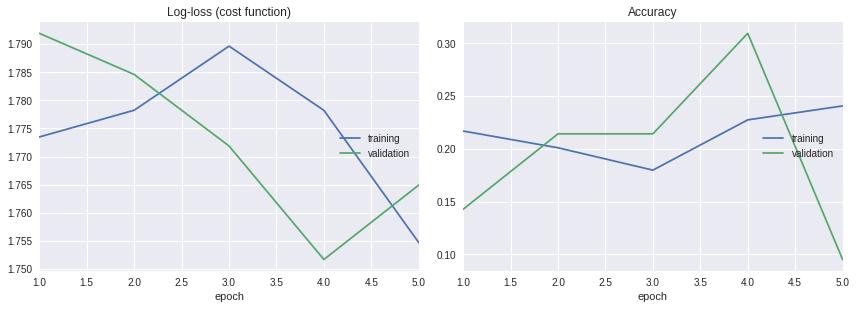

In [0]:
batch_size = 5
epochs = 5

trainingCNN_FineTuning = modelFineTuning.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split =0.1,callbacks=[PlotLossesKeras()])

In [0]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = modelFineTuning.evaluate(xTest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])

In [0]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = modelFineTuning.predict(xTest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))